## Traffic Data Analytics
Ruiqi Cheng

## Load Data

In [1]:
def set_hadoop_config(credentials):
    prefix = "fs.swift.service." + credentials['name'] 
    hconf = sc._jsc.hadoopConfiguration()
    hconf.set(prefix + ".auth.url", credentials['auth_url']+'/v2.0/tokens')
    hconf.set(prefix + ".auth.endpoint.prefix", "endpoints")
    hconf.set(prefix + ".tenant", credentials['project_id'])
    hconf.set(prefix + ".username", credentials['user_id'])
    hconf.set(prefix + ".password", credentials['password'])
    hconf.setInt(prefix + ".http.port", 8080)
    hconf.set(prefix + ".region", credentials['region'])
    hconf.setBoolean(prefix + ".public", True)

In [ ]:
#This cell is the information of data, not for running.
auth_url : https://identity.open.softlayer.com
project : object_storage_1af48bf6
project_id : f16095552d344dc3954843ca80c32126
region : dallas
user_id : 49b7b6e887a44331b098f5ac0625972a
domain_id : 67e2afb7a8a04765a2abc5bcc54f2cdf
domain_name : 798567
username : user_6f055182b56ffe5d6ac4ab66fc43e2a061dd1c2f
password : oD4.DGJ0.)s/eMf2
filename : Traffic.csv
container : notebooks
tenantId : se32-5f28891da7f5b9-704bc2b9eb79


In [2]:
credentials = {}
credentials['name'] = 'keystone'
credentials['auth_url'] = 'https://identity.open.softlayer.com'
credentials['project_id'] = 'f16095552d344dc3954843ca80c32126'
credentials['region'] = 'dallas'
credentials['user_id'] = '49b7b6e887a44331b098f5ac0625972a'
credentials['password'] = 'oD4.DGJ0.)s/eMf2'

In [3]:
set_hadoop_config(credentials)

In [4]:
page = sc.textFile("swift://notebooks.keystone/Traffic.csv")

In [5]:
print "Total records in the Traffic.csv dataset:", page.count()

Total records in the Traffic.csv dataset: 2325


In [6]:
print "The first row in the Traffic.csv dataset:", page.first()

The first row in the Traffic.csv dataset: ,Projectcode,Pagename,Pageviews,Bytes,


## Parse Data

In [7]:
pageParse = page.map(lambda line : line.split(","))

In [8]:
pageParse.first()

[u'', u'Projectcode', u'Pagename', u'Pageviews', u'Bytes', u'']

In [9]:
pageParse.first()[0]

u''

In [10]:
pageParse.first()[2]

u'Pagename'

## Explore Data

In [11]:
pageSec = pageParse.filter(lambda x: x[1] == "ar")

In [12]:
# x[0] is the projectname
# x[3] is the pageviews
pageCountByKey = pageSec.map(lambda x : (x[1], (x[3],1)))

In [13]:
pageCountByKey.first()

(u'ar', (u'1', 1))

In [14]:
pageave=pageCountByKey.map(lambda y: (y[0],int(y[1][0])/float(y[1][1])))

In [15]:
pageave.first()

(u'ar', 1.0)

In [16]:
#get total number of pageviews and the total number of pages
pageAddByKey = pageCountByKey.reduceByKey(lambda v1,v2: (int(v1[0])+int(v2[0]), int(v1[1]+v2[1])))

In [17]:
temp=pageAddByKey.first()[1][1]

In [18]:
print temp

1054


In [19]:
#get total pageview per byte
pageviewAverages = pageAddByKey.map(lambda k1: (k1[1][0]/float(k1[1][1])))

In [20]:
pageviewAverages.first()

2.407969639468691

In [21]:
ave=float(pageviewAverages.first())

In [22]:
print ave

2.40796963947


In [23]:
pagecom=pageave.map(lambda k: k[1]>ave)

In [24]:
pagecom.first()

False

In [25]:
count=0
for t in pagecom.collect():
    if t==True:
        count+=1
print count

231


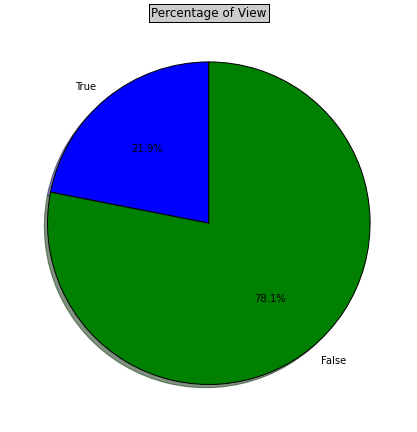

In [33]:
from pylab import *
%matplotlib inline
figure(1, figsize=(7,7))
ax = axes([0.1, 0.1, 0.8, 0.8])

labels = 'True', 'False'
x=count/float(temp)
fracs = [x,1-x]
explode=(0, 0)

pie(fracs, explode=explode, labels=labels,
                autopct='%1.1f%%', shadow=True, startangle=90)

title('Percentage of View', bbox={'facecolor':'0.8', 'pad':5})

show()

In [27]:
pageview=pageCountByKey.map(lambda x : int(x[1][0]))
pageview.collect()

[1,
 42,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 5,
 5,
 5,
 5,
 1,
 6,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 24,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 5,
 5,
 5,
 3,
 3,
 10,
 1,
 1,
 2,
 5,
 5,
 1,
 1,
 1,
 5,
 1,
 4,
 1,
 5,
 5,
 1,
 3,
 3,
 6,
 3,
 5,
 10,
 5,
 3,
 3,
 3,
 3,
 1,
 5,
 1,
 3,
 5,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 21,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 12,
 14,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 6,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 27,
 4,
 1,
 5,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 4,
 2,
 1,
 1,
 2,
 2,
 3,
 1,
 1,
 1,
 2,
 1,
 8,
 8,
 1,
 4,
 21,
 2,
 4,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 9,
 1,
 1,
 1,
 1,
 1,
 4,
 2,
 1,
 1,
 1,
 1,
 7,
 1,
 2,
 1,
 5,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 5,
 1,
 1,
 1,
 2,
 6,
 2,
 6,
 1,
 2,
 1,
 3,
 1,

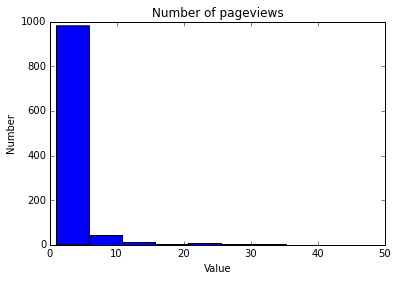

In [34]:
from pylab import *
%matplotlib inline
plt.hist(pageview.collect())
plt.title("Number of pageviews")
plt.xlabel("Value")
plt.ylabel("Number")
plt.show()